In [ ]:
import math
import random

# Clase para un nodo de un grafo que describe operaciones matemáticas y que es capaz de hacer derivadas parciales.

class Node:

#   def __init__(self, data, _children=(), _op='', label=''):
#     self.data = data
#     self.grad = 0.0
#     self._backward = lambda: None
#     self._prev = set(_children)
#     self._op = _op
#     self.label = label

#   def __repr__(self):
#     return f"Node(data={self.data})"
  
#   def __add__(self, other):
#     other = other if isinstance(other, Node) else Node(other)
#     out = Node(self.data + other.data, (self, other), '+')
    
#     def _backward():
#       self.grad += 1.0 * out.grad
#       other.grad += 1.0 * out.grad
#     out._backward = _backward
    
#     return out

#   def __mul__(self, other):
#     other = other if isinstance(other, Node) else Node(other)
#     out = Node(self.data * other.data, (self, other), '*')
    
#     def _backward():
#       self.grad += other.data * out.grad
#       other.grad += self.data * out.grad
#     out._backward = _backward
      
#     return out
  
# #   def __pow__(self, other):
# #     out = Node(self.data**other.data, (self, other), '**')
# #     return out

#   def __pow__(self, other):
#     # assert isinstance(other, (int, float)), "only supporting int/float powers for now"
#     out = Node(self.data**other.data, (self, other), '**')

#     def _backward():
#         self.grad += other.data * (self.data ** (other.data - 1)) * out.grad
#     out._backward = _backward

#     return out
  
#   def __rmul__(self, other): # other * self
#     return self * other

#   def __truediv__(self, other): # self / other
#     return self * other**-1

#   def __neg__(self): # -self
#     return self * -1

#   def __sub__(self, other): # self - other
#     return self + (-other)

#   def __radd__(self, other): # other + self
#     return self + other

#   def tanh(self):
#     x = self.data
#     t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
#     out = Node(t, (self, ), 'tanh')
    
#     def _backward():
#       self.grad += (1 - t**2) * out.grad
#     out._backward = _backward
    
#     return out
  
#   def exp(self):
#     x = self.data
#     out = Node(math.exp(x), (self, ), 'exp')
    
#     def _backward():
#       self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
#     out._backward = _backward
    
#     return out
  
  
#   def backward(self):
    
#     topo = []
#     visited = set()
#     def build_topo(v):
#       if v not in visited:
#         visited.add(v)
#         for child in v._prev:
#           build_topo(child)
#         topo.append(v)
#     build_topo(self)
    
#     self.grad = 1.0
#     for node in reversed(topo):
#       node._backward()






    def __init__(self, data, _children=(), _op='', label=''):

        # Valor numérico del nodo
        self.data= data
        # Operador usado para crear este nodo
        self._op = _op
        # Nombre del nodo (opcional)
        self.label = label
        # Gradiente de la función respecto a este nodo
        self.grad = 0.0
        # Nodos que fueron operados para crear el nodo actual
        self._prev = _children


    # Sobrecarga de operadores para poder hacer operaciones entre nodos.

    def __repr__(self):
        return f"Node(data={self.data})" #, children={self._prev})"
    
    def __add__(self, other):
        out = Node(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Node(self.data * other.data, (self, other), '*')
        return out
    
    def __sub__(self, other):
        out = Node(self.data - other.data, (self, other), '-')
        return out
    
    def __pow__(self, other):
        out = Node(self.data**other.data, (self, other), '**')
        return out

    def __iadd__(self, other):
        total = self.data + other.data
        out = Node(total, (self, other), '+')
        return out
    
    def __truediv__(self, other):
        out = Node(self.data / other.data, (self, other), '/')
        return out

    # Funciones de activación que pueden aplicarse a un nodo.

    def tanh(self):
        x = self.data
        if x > 100:
            x = 100
        elif x < -100:
            x = -100
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Node(t, (self, ), 'TanH')
        return out
    
    def RelU(self):
        x = self.data
        r = max(0, x)
        out = Node(r, (self, ), 'RelU')
        return out
    

    # # Derivadas para cada operación, con recursión para recorrer el grafo hacia atrás
    # def recurse(self): 
    #     if not self._prev:
    #         return
        
    #     if self._op == '+':
    #         for n in self._prev:
    #             n.grad += 1.0 * self.grad
    #             n.recurse()

    #     if self._op == '-':
    #         self._prev[0].grad += 1.0 * self.grad
    #         self._prev[0].recurse()
    #         self._prev[1].grad += -1.0 * self.grad
    #         self._prev[1].recurse()

    #     if self._op == '*':
    #         self._prev[0].grad += self._prev[1].data * self.grad
    #         self._prev[0].recurse()
    #         self._prev[1].grad += self._prev[0].data * self.grad
    #         self._prev[1].recurse()
        
    #     if self._op == '**':
    #         exp = self._prev[1].data
    #         self._prev[0].grad += exp * (self._prev[0].data ** (exp - 1)) * self.grad
    #         self._prev[0].recurse()
    #         # recurse(node._prev[1])

    #     if self._op == 'TanH':
    #         self._prev[0].grad += (1 - self.data**2) * self.grad
    #         self._prev[0].recurse()

    #     if self._op == 'RelU':
    #         if self.data > 0:
    #             self._prev[0].grad += 1 * self.grad
    #         else:
    #             self._prev[0].grad += 0
    #         self._prev[0].recurse()

    def backward(self):
        self.grad = 1

            # Crear lista topológicamente ordenada
        topo = []
        visited = set()
        
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        # Construir orden topológico
        build_topo(self)

        # # Construir orden topológico
        # topo = []
        # visited = set()
        # stack = [(self, False)]  # (node, expanded)
        
        # while stack:
        #     node, expanded = stack[-1]
            
        #     if not expanded:
        #         # Marcar el nodo como expandido
        #         stack[-1] = (node, True)
                
        #         # Agregar hijos no visitados
        #         if node not in visited:
        #             visited.add(node)
        #             for child in node._prev:
        #                 if child not in visited:
        #                     stack.append((child, False))
        #     else:
        #         # Si ya expandimos todos los hijos, agregar a topo
        #         stack.pop()
        #         if node not in topo:
        #             topo.append(node)

        for node in reversed(topo):
            if node._op == '+':
                for n in node._prev:
                    n.grad += 1.0 * node.grad

            elif node._op == '-':
                node._prev[0].grad += 1.0 * node.grad
                node._prev[1].grad += -1.0 * node.grad

            elif node._op == '*':
                node._prev[0].grad += node._prev[1].data * node.grad
                node._prev[1].grad += node._prev[0].data * node.grad
            
            elif node._op == '**':
                exp = node._prev[1].data
                node._prev[0].grad += exp * (node._prev[0].data ** (exp - 1)) * node.grad
                # recurse(node._prev[1])

            elif node._op == 'TanH':
                node._prev[0].grad += (1 - node.data**2) * node.grad
                # self._prev[0].recurse()

            elif node._op == 'RelU':
                if node.data > 0:
                    node._prev[0].grad += 1 * node.grad
                else:
                    node._prev[0].grad += 0
                # node._prev[0].recurse()
            
            elif node._op == '/':
                node._prev[0].grad += (1/ node._prev[1].data) * node.grad
                node._prev[1].grad += ((-node._prev[0].data) / (node._prev[1].data**2))* node.grad 



    # def backward(self):
    #     topo = []
    #     visited = set()
    #     def build_topo(v):
    #         if v not in visited:
    #             visited.add(v)
    #             for child in v._prev:
    #                 build_topo(child)
    #             topo.append(v)
    #     build_topo(self)

# Clase para una neurona de la red neuronal. Usa nodos para representar las operaciones matemáticas que describen la neurona (pesos, bias, suma ponderada, función de activación).

class Neuron:
    def __init__(self, inputs):
        # Lista de pesos (uno por cada entrada)
        self.w = []
        for _ in range(inputs):
            self.w.append(Node(random.uniform(-1, 1)))
        # Bias
        self.b = Node(random.uniform(-1,1))

        # print(self.w, self.b)

    # Regresa los parámetros de la neurona (pesos y bias) como nodos.
    def parameters(self):
        return self.w + [self.b]

    # Al llamar a la neurona con una lista de entradas regresa la salida de la neurona.
    def __call__(self, x):
        # Inicializar el total de la activación sumandole el bias.
        total = Node(self.b.data)

        # Crea pares de peso y entrada.
        for wi, xi in zip(self.w, x):
            # Si la entrada no es un nodo, lo convierte en uno para poderla operar.
            if type(xi) != Node:
                xi = Node(xi)
            # print('weight/input: ', wi, xi)
            # Multiplica el peso por la entrada y lo suma al total.
            activation = wi * xi
            total = total + activation
        # Normaliza la activación de la neurona
        output = total.tanh()

        # out = activation.tanh()
        return output
    


# Clase para una capa de la red neuronal compuesta de varias neuronas. Está completamente conectada a la capa anterior.

class Layer:
    def __init__(self, inputs, outputs):
        # Crea una lista de neuronas correspondiendo con el número de salidas de esa capa. Cada neurona está conectada a todas las entradas.
        self.neurons = []
        for _ in range(outputs):
            self.neurons.append(Neuron(inputs))
    
    # Al llamar la capa con una lista de entradas regresa la salida de cada neurona.
    def __call__(self, x):
        output = []
        for neuron in self.neurons:
            # print('neuron: ', neuron.w, neuron.b)
            output.append(neuron(x))
        return output[0] if len(output) == 1 else output
    
    # Regresa los parámetros de cada neurona de la capa como nodos. No necesita estar ordenada por que cada uno guarda su propio gradiente.
    def parameters(self):
        parameters = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            parameters.extend(ps)
        return parameters
    


# Clase para una red neuronal densa. 

class NN:
    def __init__(self, inputs, layers):
        # Crear una lista con el número de valores por capa incluyendo la entrada para poder crear las capas con el número de entradas y de neuronas correcto. 
        inout = [inputs] + layers 
        self.layers = []

        # Crea capas que tienen el número de entradas = al número de salidas de la capa anterior.
        for i in range(len(layers)):
            self.layers.append(Layer(inout[i], inout[i+1]))
    
    # Al llamar la red neuronal con una lista de entradas regresa la salida de la última capa. Se llama de forma iterativa para ir actualizando los valores desde la primera capa.
    def __call__(self, x):
        for layer in self.layers:
            # print('layer: ', layer)
            x = layer(x)
        return x

    # Regresa lois parámetros de cada neurona de cada capa como nodos.
    def parameters(self):
        parameters = []
        for layer in self.layers:
            ps = layer.parameters()
            parameters.extend(ps)
        return parameters
    



# Red neuronal con 3 entradas, 2 capas de 4 neuronas y 1 neurona de salida.
n = NN(3, [4,4,1])

# Entradas de ejemplo
xs = [[2.0, 3.0, -1.0],
      [3.0, -1.0, 0.5],
      [0.5, 1.0, 1.0],
      [1.0, 1.0, -1.0]]

# salidas de ejemplo
ys = [1.0, -1.0, -1.0, 1.0]

def predict(network, xs):
    prediction = []
    for x in xs:
        prediction.append(network(x))
    return prediction

ypred = predict(n, xs)

print( 'predicciones iniciales: ', ypred )

def train(network, xs, ys, epochs=1000, learning_rate=0.01, printability=100):
    for i in range(epochs):

        # Fordward
        ypred = predict(network, xs)
        # Calculo de la pérdida con el error cuadrático.
        loss = Node(0.0)
        for yt, yout in zip(ys, ypred):
            
            # Convert single values to list
            if isinstance(yt, (int, float)):
                yt = [yt]
            
            # Ensure prediction is in correct format
            if not isinstance(yout, list):
                yout = [yout]

            for target, pred in zip(yt, yout):
                loss += (pred - Node(target))**Node(2)

        # Backward 
        # Backpropagation calculando el gradiente de la función de pérdida respecto a cada parámetro.
        loss.backward()

        # Update
        for parameter in network.parameters():
            parameter.data += -learning_rate * parameter.grad
            parameter.grad = 0.0
        
        if i % printability == 0:
            print(f"Epoch {i}, loss: {loss.data}")

    

train(n, xs, ys, epochs=2000, learning_rate=0.05)

print('predicciones finales: ', predict(n, xs))






predicciones iniciales:  [Node(data=0.918544731960301), Node(data=0.8717758660432263), Node(data=0.9564107284764817), Node(data=0.9107365347972827)]
Epoch 0, loss: 7.345690758111164
Epoch 100, loss: 0.004229362238664136
Epoch 200, loss: 0.0019614228371546243
Epoch 300, loss: 0.0012690844825169762
Epoch 400, loss: 0.0009357990668297002
Epoch 500, loss: 0.0007402595689179857
Epoch 600, loss: 0.000611867678454924
Epoch 700, loss: 0.0005211789058838343
Epoch 800, loss: 0.00045374897160140525
Epoch 900, loss: 0.0004016674967409682
Epoch 1000, loss: 0.000360241560692169
Epoch 1100, loss: 0.0003265121028370124
Epoch 1200, loss: 0.000298521506827089
Epoch 1300, loss: 0.00027492333005719495
Epoch 1400, loss: 0.00025476124825122356
Epoch 1500, loss: 0.0002373374199453625
Epoch 1600, loss: 0.0002221307527196009
Epoch 1700, loss: 0.00020874432136272738
Epoch 1800, loss: 0.0001968704929233602
Epoch 1900, loss: 0.0001862671745527441
predicciones finales:  [Node(data=0.9964001116462488), Node(data=-0

In [235]:
import pandas as pd
df = pd.read_csv('StressLevelDataset.csv')
df.head()



,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [257]:

y = df[['stress_level']]
x = df[['self_esteem', 'sleep_quality', 'depression']]

# x = df[['anxiety_level', 'self_esteem', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']]

In [262]:
y = y-1

In [263]:
y

,stress_level
0,0
1,1
2,0
3,1
4,0
...,...
1095,0
1096,1
1097,-1
1098,1


In [264]:
x.shape

(1100, 3)

In [265]:
import numpy as np

Xtrain = np.array(x[:-100])
Xtest = np.array(x[-100:])

Ytrain = np.array(y[:-100])
Ytest = np.array(y[-100:])


In [266]:
# Ytest = Ytest.astype(int)

Ytest

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 0],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [-1],
       [ 0],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 0],
       [ 1],
       [-1],
       [-1],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [-1],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 0],
       [ 0],
       [ 1],

In [267]:
X_train_list = Xtrain.tolist()
Y_train_list = Ytrain.tolist()

In [268]:
import sys
sys.setrecursionlimit(100000)

In [269]:
X_test_list = Xtest.tolist()
Y_test_list = Ytest.tolist()

In [293]:
stress_predictor = NN(3, [10, 7, 1])
stress_predictor(X_test_list[7])

Node(data=0.291079721144646)

In [320]:




train(stress_predictor, X_train_list, Y_train_list, epochs=100, learning_rate=0.0001, printability=1)


Epoch 0, loss: 207.46158227497338
Epoch 1, loss: 196.07551273987013
Epoch 2, loss: 188.65222593106955
Epoch 3, loss: 183.80133814140595
Epoch 4, loss: 180.67978806854788
Epoch 5, loss: 178.69575025401141
Epoch 6, loss: 177.44330611478946
Epoch 7, loss: 176.65401033371663
Epoch 8, loss: 176.1550624609581
Epoch 9, loss: 175.83717165654033
Epoch 10, loss: 175.63195695980008
Epoch 11, loss: 175.49689827884384
Epoch 12, loss: 175.4056404201064
Epoch 13, loss: 175.34186659987233
Epoch 14, loss: 175.29547044901796
Epoch 15, loss: 175.2601793719335
Epoch 16, loss: 175.232084681228
Epoch 17, loss: 175.2087350187911
Epoch 18, loss: 175.1885784346032
Epoch 19, loss: 175.17061964032794
Epoch 20, loss: 175.1542096737932
Epoch 21, loss: 175.13891680974936
Epoch 22, loss: 175.12444719328627
Epoch 23, loss: 175.1105958450492
Epoch 24, loss: 175.09721620337092
Epoch 25, loss: 175.08420098929673
Epoch 26, loss: 175.0714700086828
Epoch 27, loss: 175.0589622291095
Epoch 28, loss: 175.04663051568158
Epoch 

In [338]:

stress_predictor(X_test_list[4])

Node(data=-0.8926967384534831)

In [337]:
Y_test_list[4]

[-1]

In [339]:
import matplotlib.pyplot as plt

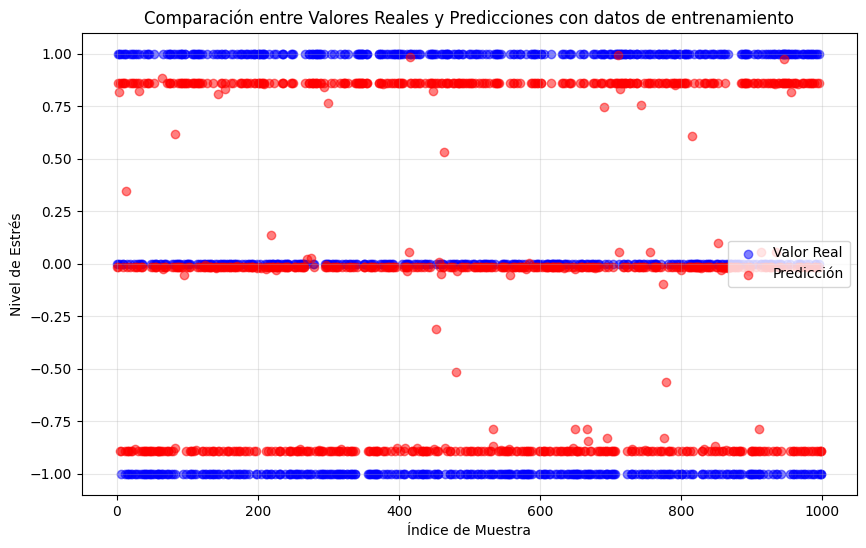

Error cuadrático medio: 0.1742


In [343]:
y_pred_train = []
for x in X_train_list:
    pred = stress_predictor(x)
    # Convertir Node a valor float
    if isinstance(pred, list):
        y_pred_train.append([p.data for p in pred])
    else:
        y_pred_train.append(pred.data)

# Convertir predicciones y valores reales a arrays numpy
y_pred_train = np.array(y_pred_train)
y_true = np.array([yt[0] for yt in Y_train_list])  # Extraer valores de las listas

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_true)), y_true, c='blue', label='Valor Real', alpha=0.5)
plt.scatter(range(len(y_pred_train)), y_pred_train, c='red', label='Predicción', alpha=0.5)
plt.xlabel('Índice de Muestra')
plt.ylabel('Nivel de Estrés')
plt.title('Comparación entre Valores Reales y Predicciones con datos de entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Imprimir métricas de error
mse = np.mean((y_true - y_pred_train)**2)
print(f"Error cuadrático medio: {mse:.4f}")

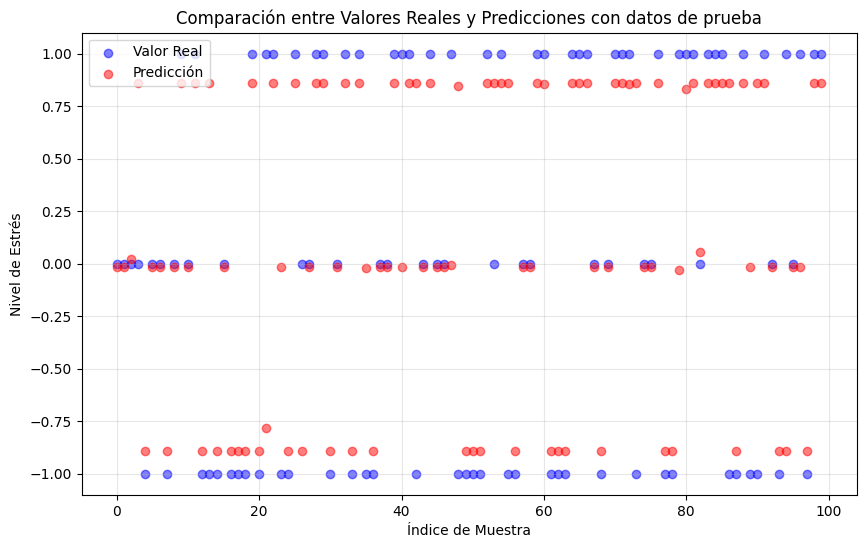

Error cuadrático medio: 0.4122


In [342]:
y_pred = []
for x in X_test_list:
    pred = stress_predictor(x)
    # Convertir Node a valor float
    if isinstance(pred, list):
        y_pred.append([p.data for p in pred])
    else:
        y_pred.append(pred.data)

# Convertir predicciones y valores reales a arrays numpy
y_pred = np.array(y_pred)
y_true = np.array([yt[0] for yt in Y_test_list])  # Extraer valores de las listas

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_true)), y_true, c='blue', label='Valor Real', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicción', alpha=0.5)
plt.xlabel('Índice de Muestra')
plt.ylabel('Nivel de Estrés')
plt.title('Comparación entre Valores Reales y Predicciones con datos de prueba')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Imprimir métricas de error
mse = np.mean((y_true - y_pred)**2)
print(f"Error cuadrático medio: {mse:.4f}")